# Diabetes Data Set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf  
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [4]:
df = pd.read_csv("diabetes.csv")
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
441,2,83,66,23,50,32.2,0.497,22,0
383,1,90,62,18,59,25.1,1.268,25,0
390,1,100,66,29,196,32.0,0.444,42,0
587,6,103,66,0,0,24.3,0.249,29,0
270,10,101,86,37,0,45.6,1.136,38,1
254,12,92,62,7,258,27.6,0.926,44,1
693,7,129,68,49,125,38.5,0.439,43,1
510,12,84,72,31,0,29.7,0.297,46,1
183,5,73,60,0,0,26.8,0.268,27,0
507,1,130,60,23,170,28.6,0.692,21,0


In [6]:
df=df[df.SkinThickness<70]
df=df[df.Glucose>0]
df=df[df.BloodPressure>35]
df=df[df.BMI>0]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               720 non-null    int64  
 1   Glucose                   720 non-null    int64  
 2   BloodPressure             720 non-null    int64  
 3   SkinThickness             720 non-null    int64  
 4   Insulin                   720 non-null    int64  
 5   BMI                       720 non-null    float64
 6   DiabetesPedigreeFunction  720 non-null    float64
 7   Age                       720 non-null    int64  
 8   Outcome                   720 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.2 KB


In [10]:
df.Outcome.value_counts()

# Unbalanced

Outcome
0    473
1    247
Name: count, dtype: int64

## Train|Test Split

In [9]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Modelling and Model Performance

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [17]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)
dt_model.fit(X_train, y_train)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

# Data seti dengesiz olduğundan ve target label'ın skoru kötü olduğundan direkt class_weight = "balanced" kullandım.

Test_Set
[[78 19]
 [19 28]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        97
           1       0.60      0.60      0.60        47

    accuracy                           0.74       144
   macro avg       0.70      0.70      0.70       144
weighted avg       0.74      0.74      0.74       144


Train_Set
[[376   0]
 [  0 200]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       200

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [19]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

In [25]:
from sklearn.model_selection import StratifiedKFold

model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)


cv = StratifiedKFold(n_splits=10)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'],
                        cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy      0.753267
train_accuracy     1.000000
test_precision     0.646219
train_precision    1.000000
test_recall        0.630000
train_recall       1.000000
test_f1            0.634405
train_f1           1.000000
dtype: float64

In [26]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],
              "max_depth": [None, 2, 3, 4],
              "min_samples_leaf": [2, 3],
              "min_samples_split": [2, 3, 4]}

In [27]:
model = DecisionTreeClassifier(class_weight="balanced", random_state=101)

cv = StratifiedKFold(n_splits=10)
dt_grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='recall',
                            cv = cv,
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [28]:
dt_grid_model.best_params_

{'max_depth': 2,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

In [29]:
dt_grid_model.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=2,
                       random_state=101, splitter='random')

In [30]:
eval_metric(dt_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[24 73]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.86      0.25      0.38        97
           1       0.37      0.91      0.53        47

    accuracy                           0.47       144
   macro avg       0.61      0.58      0.46       144
weighted avg       0.70      0.47      0.43       144


Train_Set
[[142 234]
 [  9 191]]
              precision    recall  f1-score   support

           0       0.94      0.38      0.54       376
           1       0.45      0.95      0.61       200

    accuracy                           0.58       576
   macro avg       0.69      0.67      0.58       576
weighted avg       0.77      0.58      0.56       576



In [31]:
model = DecisionTreeClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=2,
                       random_state=101, splitter='random')

cv = StratifiedKFold(n_splits=10)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'],
                        cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

# Overfiting yok. Test datasındaki 1 classının skorları ile validation setinin skorları tutarlı.

test_accuracy      0.583243
train_accuracy     0.579283
test_precision     0.452976
train_precision    0.450100
test_recall        0.955000
train_recall       0.953889
test_f1            0.614221
train_f1           0.611588
dtype: float64

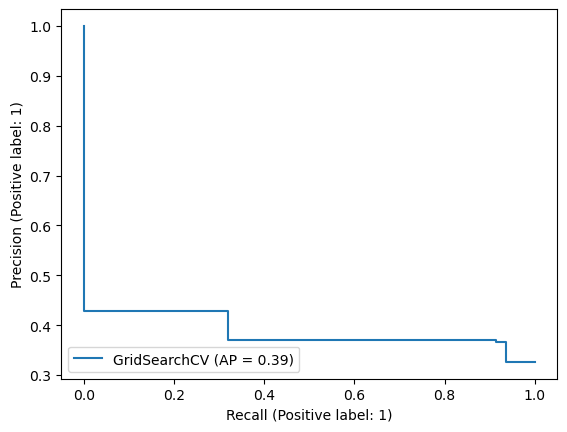

In [32]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(dt_grid_model, X_test, y_test)

# modelin genel performansı çok düşük.